In [44]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc, recall_score, precision_score, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

%matplotlib inline

In [45]:
import pandas as pd

data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/london_weather.csv", encoding='ISO-8859-1')
data.head()


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [46]:
data.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [48]:
data.duplicated().sum()
data.drop_duplicates()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [49]:
data.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [50]:
# Lista delle colonne da riempire con la media
columns_to_fill = [
    "cloud_cover",
    "global_radiation",
    "max_temp",
    "mean_temp",
    "min_temp",
    "precipitation",
    "snow_depth",
    "pressure"
]

# Riempire i valori mancanti con la media
for col in columns_to_fill:
    data[col] = data[col].fillna(data[col].mean())


In [51]:
data.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [52]:
# Extracting the Day, Month, and Year coulmns from the date column then dropping the date column
data['date'] = pd.to_datetime(data['date'],format="%Y%m%d")
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
Weather = data.drop('date', axis=1)
Weather.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,day,month,year
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1,1,1979
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,2,1,1979
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,3,1,1979
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,4,1,1979
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,5,1,1979


In [53]:
# Create dummies - for better model outcomes
data = pd.get_dummies(data)
data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,day,month,year
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1,1,1979
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,2,1,1979
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,3,1,1979
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,4,1,1979
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,5,1,1979


In [54]:
data.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,day,month,year
count,15341,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000
mean,2000-01-01 00:00:00,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986,15.730070,6.522782,1999.500359
min,1979-01-01 00:00:00,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000,1.000000,1.000000,1979.000000
25%,1989-07-02 00:00:00,4.000000,0.500000,41.000000,10.500000,7.100000,3.500000,0.000000,100920.000000,0.000000,8.000000,4.000000,1989.000000
50%,2000-01-01 00:00:00,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000,16.000000,7.000000,2000.000000
75%,2010-07-02 00:00:00,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000,23.000000,10.000000,2010.000000
max,2020-12-31 00:00:00,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000,31.000000,12.000000,2020.000000
std,NaN,2.068790,4.028339,88.843200,6.553472,5.722981,5.326409,3.737809,1049.585735,0.519373,8.800562,3.448856,12.121708


In [55]:
data = data.drop(['date', 'day', 'month', 'year'], axis=1)

In [56]:


# Seleziona solo le colonne numeriche per il pre-processing
numerical_columns = ['cloud_cover', 'sunshine', 'global_radiation', 
                     'max_temp', 'mean_temp', 'min_temp',
                      'pressure', 'snow_depth']

# Gestione valori mancanti (opzionale, se non è stato già fatto)
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Inizializza il MinMaxScaler
scaler = MinMaxScaler()

# Applica il MinMaxScaler alle colonne numeriche
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Creazione della colonna binaria 'y' per la classificazione
data['y'] = [0 if x == 0 else 1 for x in data['precipitation']]

# Visualizza le prime righe per confermare il risultato
print(data.head())


   cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  \
0     0.222222   0.43750          0.111675  0.192744   0.095628  0.126100   
1     0.666667   0.10625          0.048223  0.176871   0.136612  0.126100   
2     0.555556   0.00000          0.012690  0.170068   0.131148  0.134897   
3     0.888889   0.00000          0.012690  0.133787   0.136612  0.155425   
4     0.666667   0.12500          0.053299  0.267574   0.185792  0.304985   

   precipitation  pressure  snow_depth  y  
0            0.4  0.670429    0.409091  1  
1            0.0  0.741535    0.363636  0  
2            0.0  0.687359    0.181818  0  
3            0.0  0.550790    0.090909  0  
4            0.0  0.709932    0.045455  0  


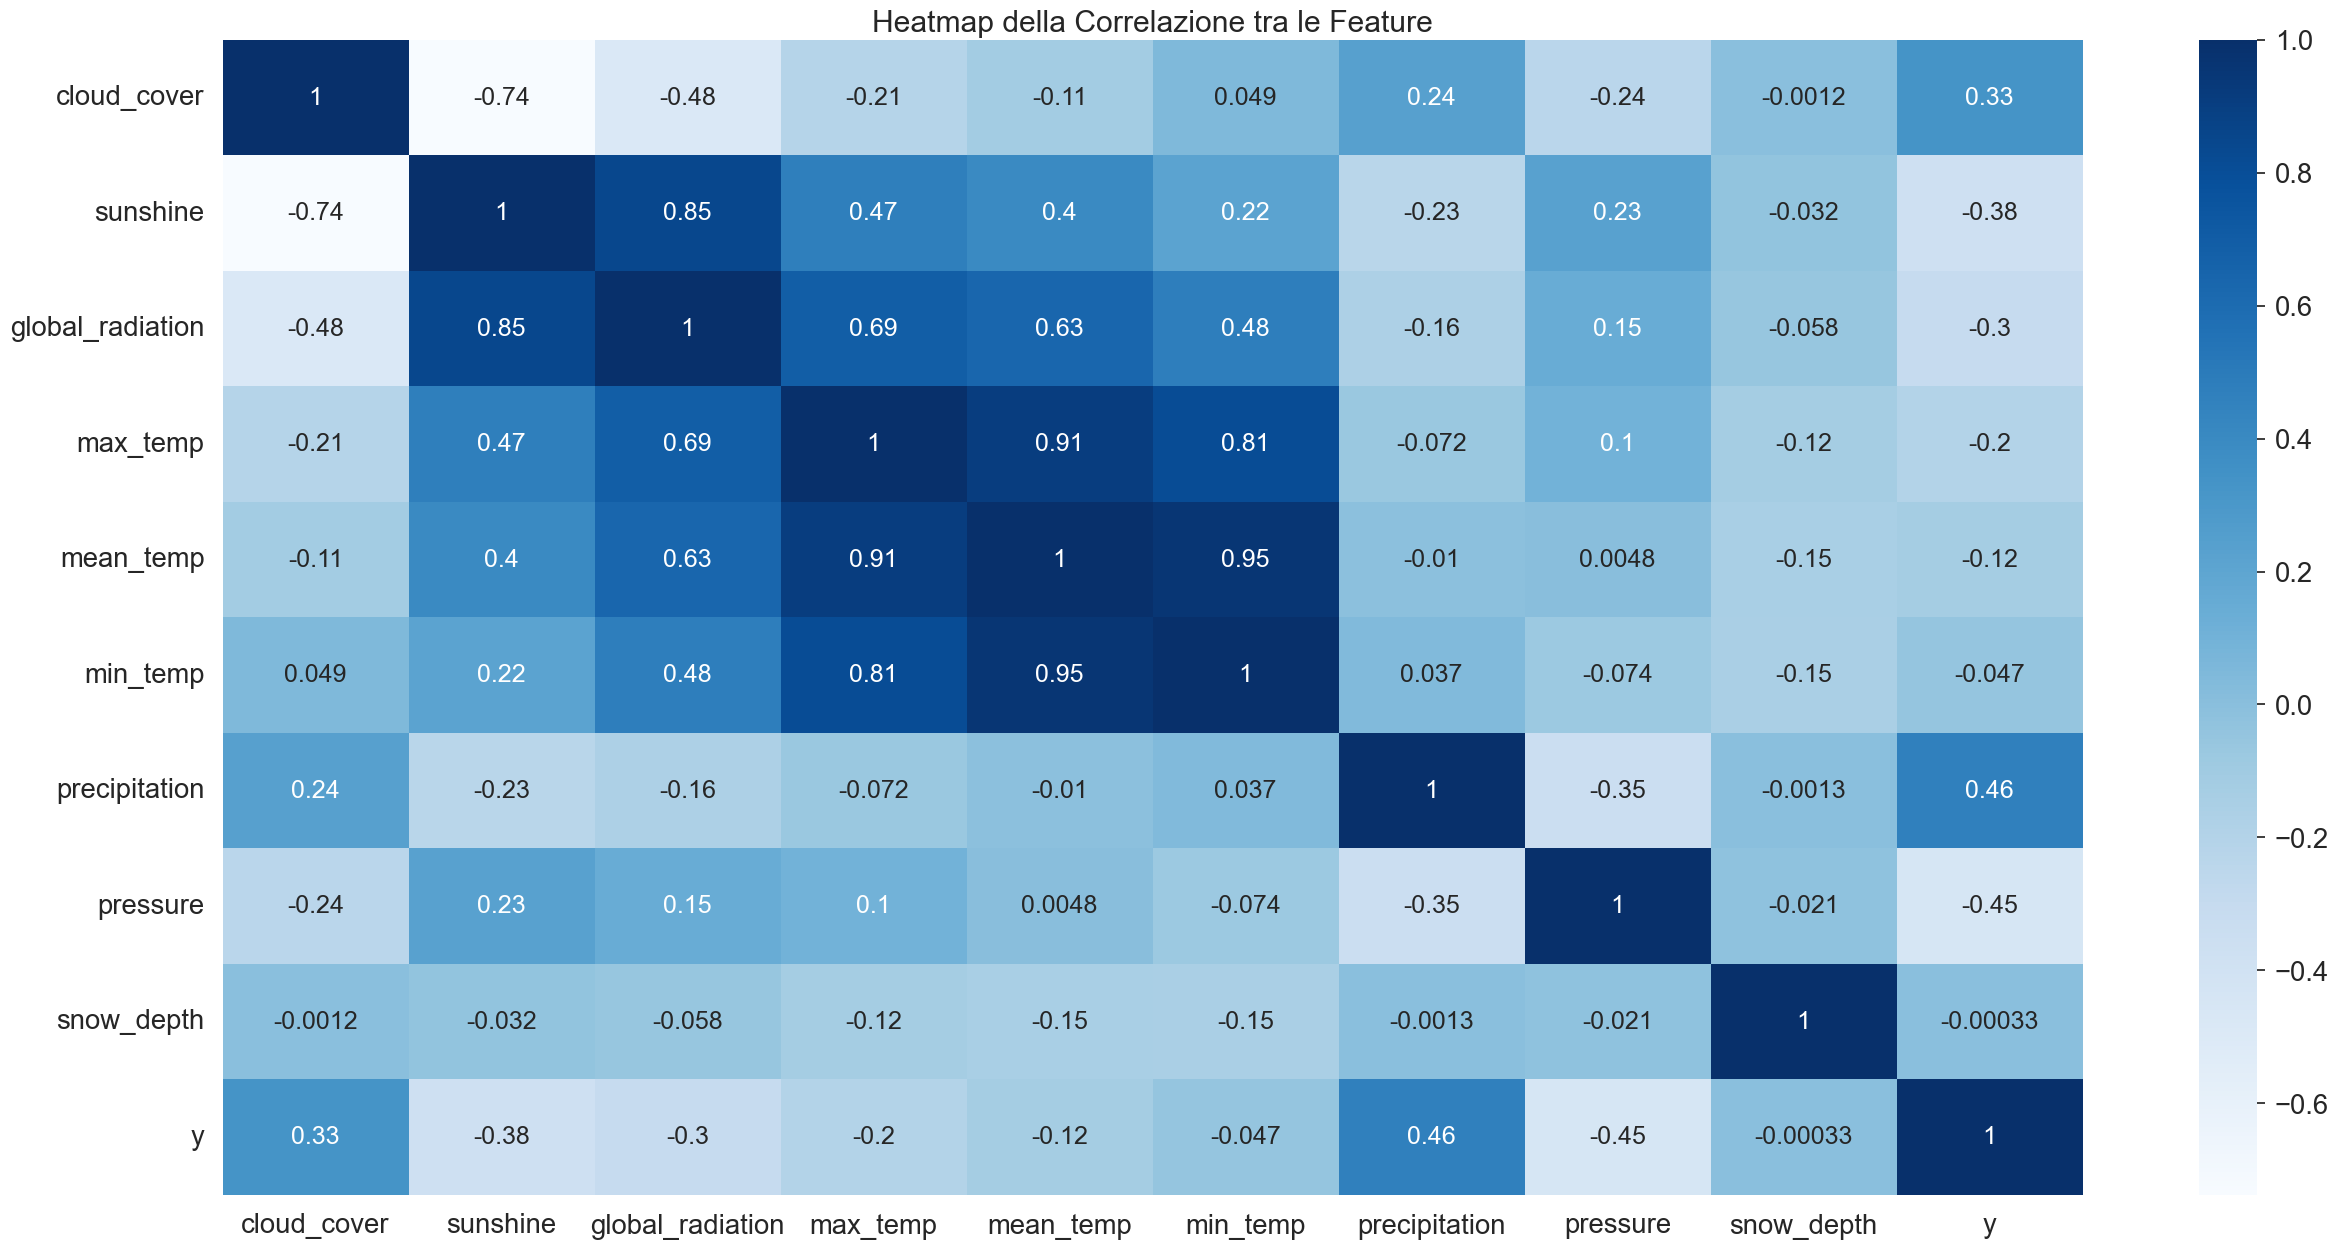

In [57]:
# Selezionare solo le colonne numeriche
numeric_data = data.select_dtypes(include=['float64', 'int64'])
# Seleziona le variabili X (features) e y (target)
x = data[numerical_columns]  # Features
# Calcolare e visualizzare la matrice di correlazione
plt.figure(figsize=(30, 15))
sns.heatmap(numeric_data.corr(), cmap="Blues", annot=True, annot_kws={"size": 18})

# Aggiungere il titolo
plt.title("Heatmap della Correlazione tra le Feature")
plt.show()

In [58]:
# Drop values to avoid variables with too high correlation
x = x.drop(['max_temp', 'mean_temp', 'min_temp', 'global_radiation'], axis=1)

<Figure size 3000x1500 with 0 Axes>

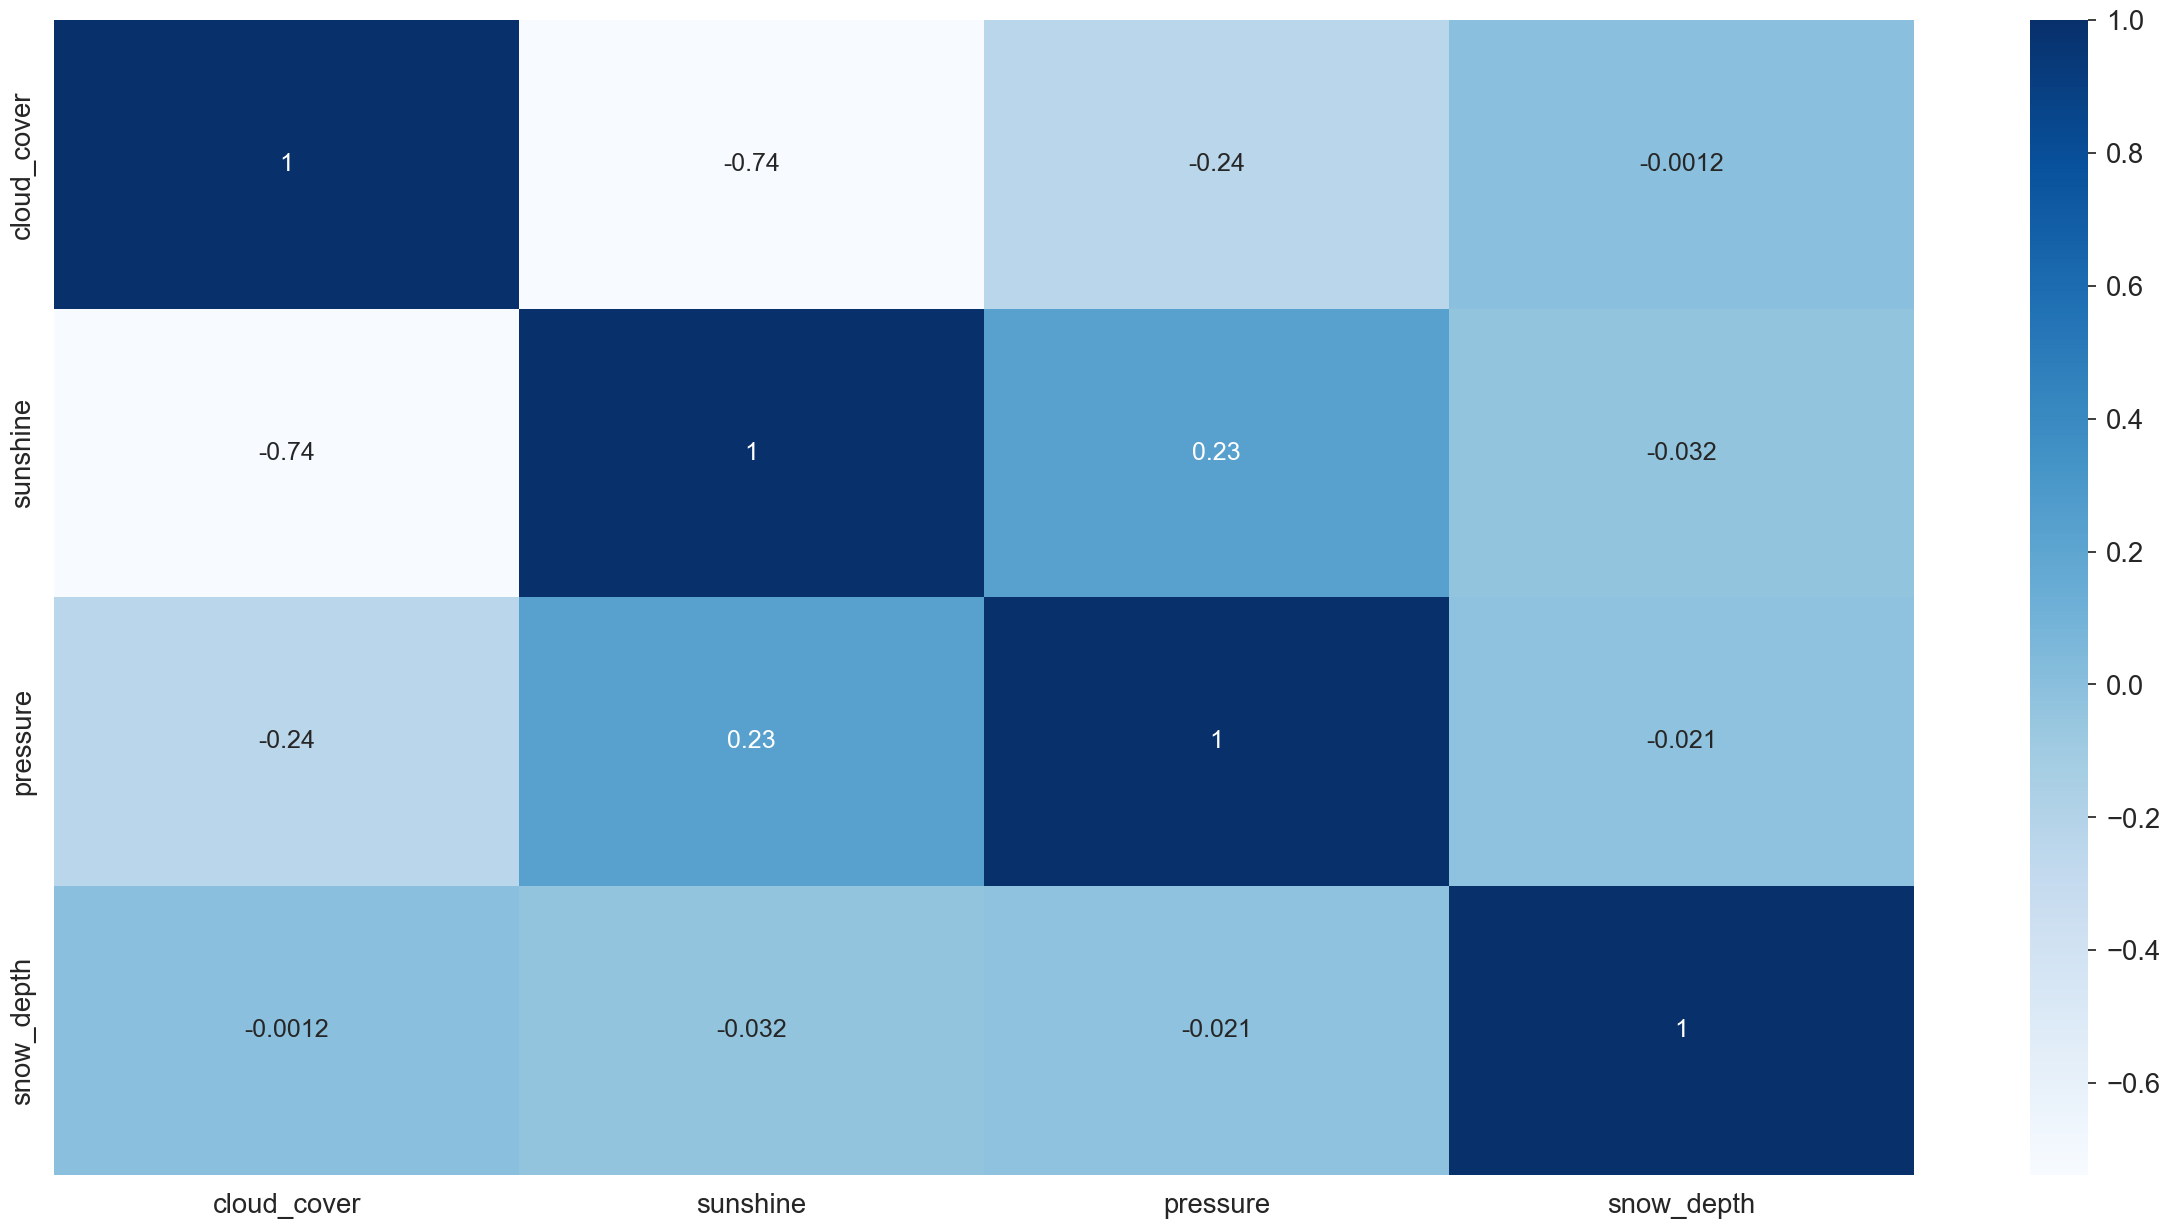

In [59]:
plt.figure(figsize=(30,15))



plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [60]:
# Seleziona le variabili X (features) e y (target)
x = data[numerical_columns]  # Features
y = data['y']  # Target (0: no precipitation, 1: precipitation)

# Random state
rs = 42

# Split dei dati in training e test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# Controlla la forma dei dati
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(12272, 8)
(3069, 8)
(12272,)
(3069,)


In [61]:
# Lista dei classificatori
classifiers = [
    LogisticRegression(random_state=rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators=10, random_state=rs),
    GradientBoostingClassifier(random_state=rs),
    AdaBoostClassifier(n_estimators=10, random_state=rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True)
]

# Liste per memorizzare i risultati
clf_name = []  # Nomi dei classificatori
model_results = pd.DataFrame(y_test.reset_index(drop=True))  # Risultati delle predizioni, assicurati che 'y' sia una colonna

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5)  # Cross-validation stratificata
cv_results = []  # Risultati dalla cross-validation
cv_acc = []  # Accuratezza media dalla cross-validation
cv_std = []  # Deviazione standard dalla cross-validation

cnfm = []  # Matrice di confusione
clr = []  # Report di classificazione
roc_auc = []  # AUC della curva ROC
roc_tpr = []  # True Positive Rate
roc_fpr = []  # False Positive Rate





In [62]:
# Addestramento dei modelli e raccolta dei risultati
for clf in classifiers:
    name = clf.__class__.__name__  # Nome del classificatore
    clf_name.append(name)
    
    # Fit del modello e predizioni
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred  # Aggiungi le predizioni alla tabella model_results
    
    # Calcolo dell'accuratezza e della log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring="accuracy", cv=kfold))
    acc = round(accuracy_score(y_test, y_pred), 2)
    print(f'Accuracy: {acc} \t ---> {name}')
    
    # Calcolo della matrice di confusione, classification report, e curva ROC
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)

# Calcolo dei risultati della cross-validation
for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Accuracy: 0.74 	 ---> LogisticRegression
Accuracy: 0.65 	 ---> DecisionTreeClassifier
Accuracy: 0.72 	 ---> RandomForestClassifier
Accuracy: 0.75 	 ---> GradientBoostingClassifier
Accuracy: 0.73 	 ---> AdaBoostClassifier
Accuracy: 0.74 	 ---> LinearDiscriminantAnalysis
Accuracy: 0.75 	 ---> SVC


In [63]:
# Stampa la lunghezza delle liste per assicurarti che siano uguali
print("Length of cv_acc:", len(cv_acc))
print("Length of cv_std:", len(cv_std))
print("Length of clf_name:", len(clf_name))


Length of cv_acc: 7
Length of cv_std: 7
Length of clf_name: 7


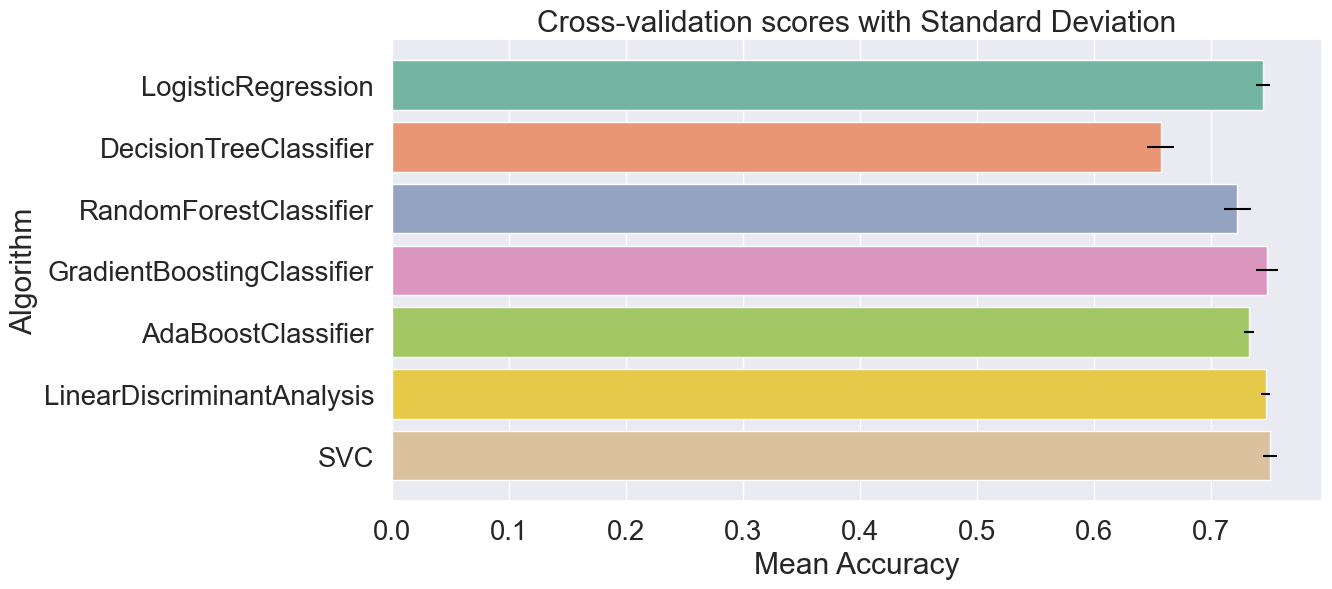

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creazione del dataframe per i risultati
cv_results = pd.DataFrame({
    "CrossValMeans": cv_acc, 
    "CrossValErrors": cv_std,  # Deviazione standard
    "Algorithm": clf_name
})

# Creazione del grafico con barre di errore personalizzate
plt.figure(figsize=(12, 6))
sns.barplot(
    x="CrossValMeans", 
    y="Algorithm", 
    data=cv_results, 
    palette="Set2", 
    orient="h",
    ci=None  # Disattiva il calcolo automatico dell'intervallo di confidenza
)

# Aggiunta manuale delle barre di errore
plt.errorbar(
    x=cv_results["CrossValMeans"], 
    y=range(len(cv_results["Algorithm"])), 
    xerr=cv_results["CrossValErrors"], 
    fmt="none", 
    ecolor="black", 
    capsize=5
)

# Etichetta e titolo
plt.xlabel("Mean Accuracy")
plt.title("Cross-validation scores with Standard Deviation")
plt.show()




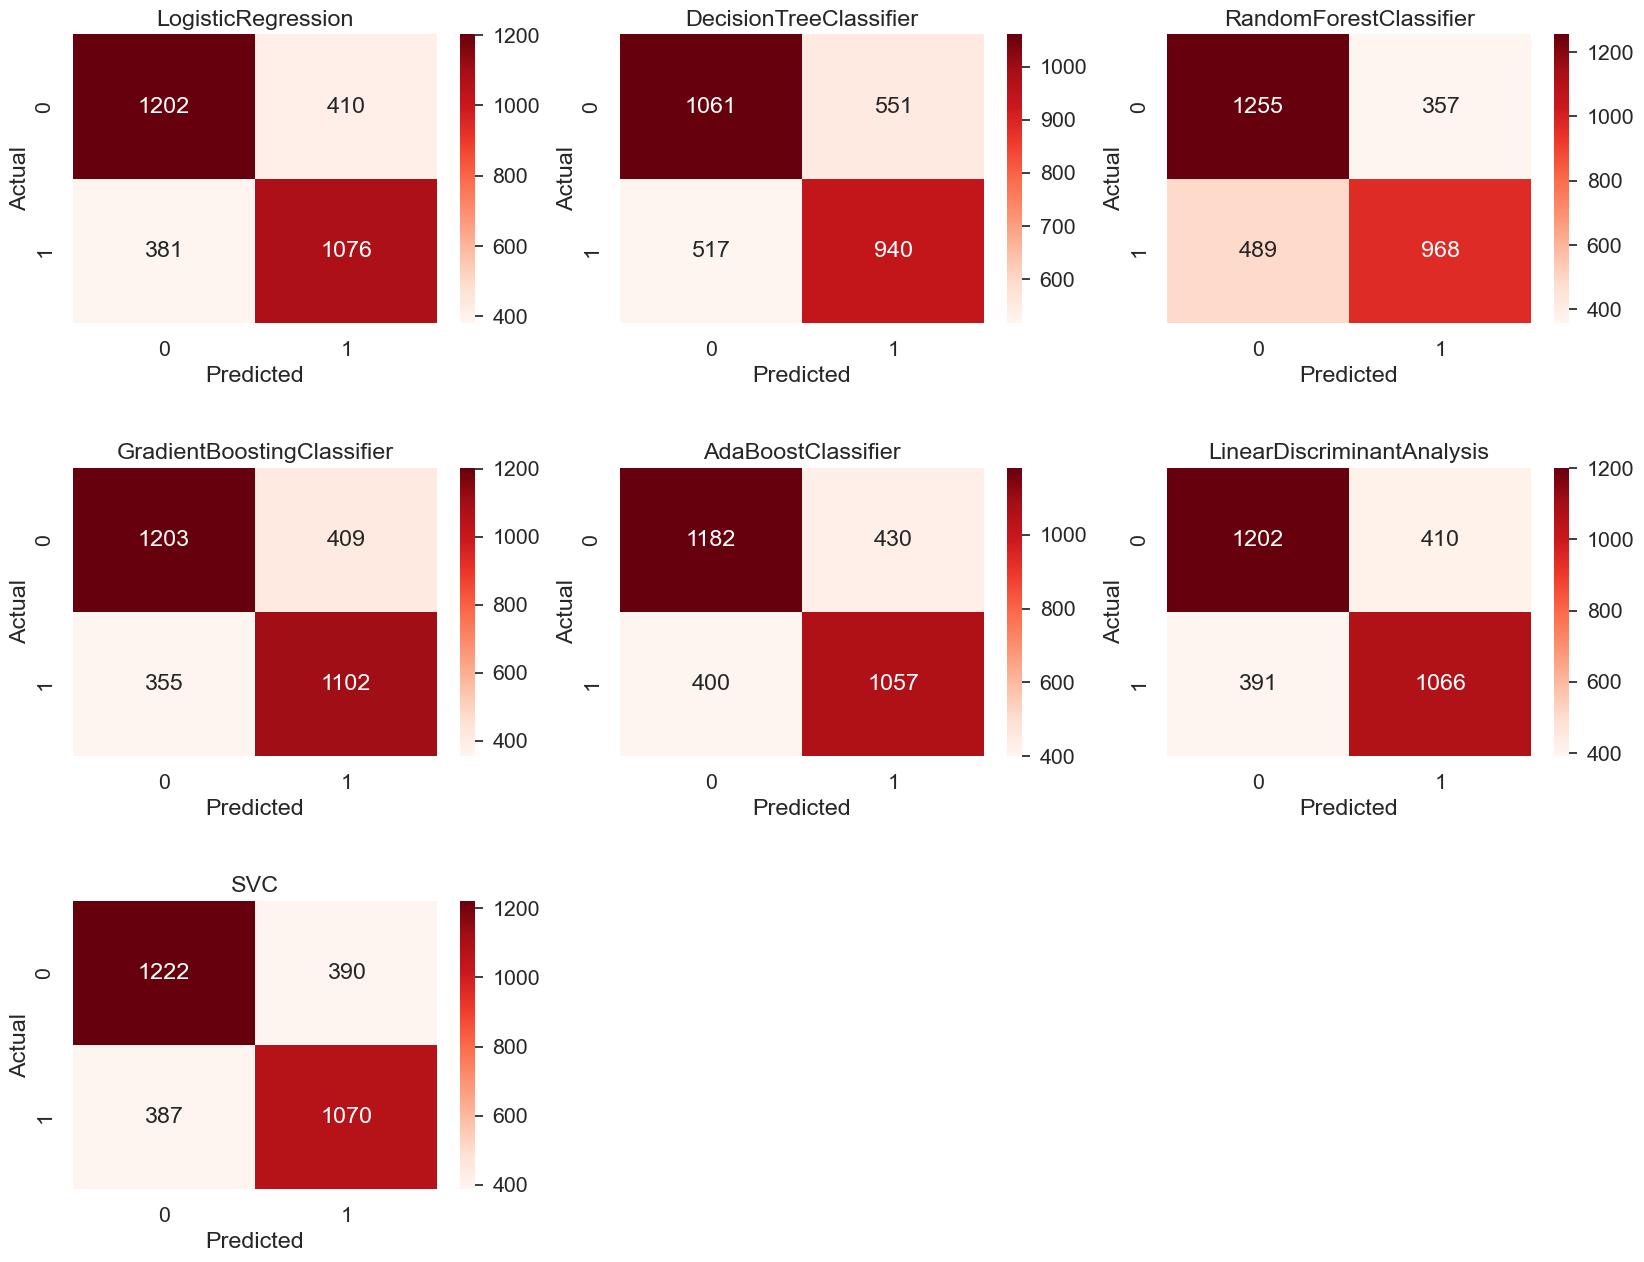

In [65]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [66]:

#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1612
           1       0.72      0.74      0.73      1457

    accuracy                           0.74      3069
   macro avg       0.74      0.74      0.74      3069
weighted avg       0.74      0.74      0.74      3069

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      1612
           1       0.63      0.65      0.64      1457

    accuracy                           0.65      3069
   macro avg       0.65      0.65      0.65      3069
weighted avg       0.65      0.65      0.65      3069

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1612
           1       0.73      0.66      0.70      1457

    accuracy                           0.72     

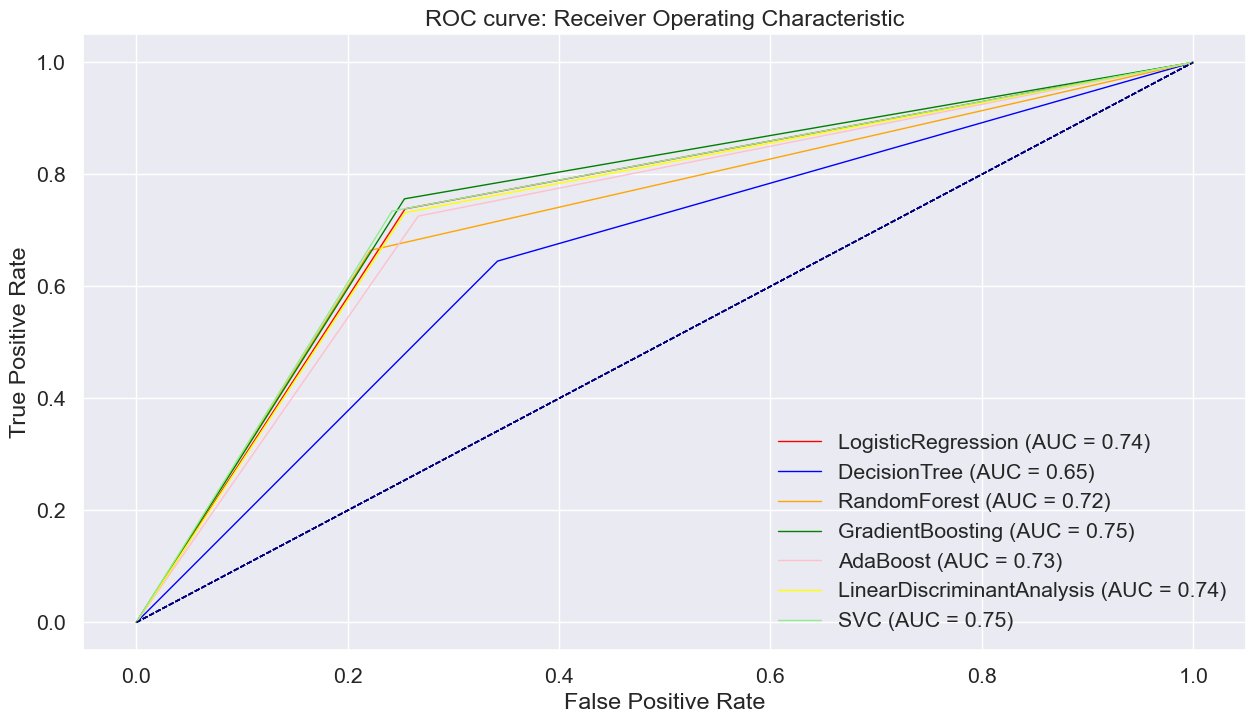

In [67]:
# ROC Curve: fornisce un altro metodo per valutare il modello
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [68]:

#optimal parameters for decision tree and random forest
LR_param={
    "penalty": ["l1", "l2", None],
    "max_iter": [30,50,100],
    "n_jobs": [1,3,7],
    "C": [0.3,0.7,1.0],
    "fit_intercept": [True]

}

DT_param = {
    "max_depth": [2,3,8,10],
    "max_features": [0.3,0.7,1],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10],
    "criterion": ["gini"]
}
RF_param = {
    "max_depth": [None],
    "max_features": [0.3,0.7,1],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10],
    "bootstrap": [False],
    "n_estimators": [100,300],
    "criterion": ["gini"]
}

LRgs=GridSearchCV(LogisticRegression(), param_grid=LR_param, cv =kfold, n_jobs=4, scoring="accuracy", verbose=True)
DTgs=GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv =kfold, n_jobs=4, scoring="accuracy", verbose=True)
RFgs=GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv =kfold, n_jobs=4, scoring="accuracy", verbose=True)

models= [LRgs,DTgs,RFgs]

gs_model = []
score= []

for model in models:
    model.fit(x_train,y_train)
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [69]:
#scores without GridSearch
print("score without GridSearchCV: ", round(cv_acc[0], 3), round(cv_acc[1],3),round(cv_acc[2],3))
#scores with GridSearch
print("score with GridSearchCV: ",round(score[0],3),round(score[1],3), round(score[2],3))


score without GridSearchCV:  0.745 0.657 0.723
score with GridSearchCV:  0.746 0.731 0.748


In [70]:
# Visualizzare le colonne
print(model_results.columns)

Index(['y', 'LogisticRegression', 'DecisionTreeClassifier',
       'RandomForestClassifier', 'GradientBoostingClassifier',
       'AdaBoostClassifier', 'LinearDiscriminantAnalysis', 'SVC'],
      dtype='object')


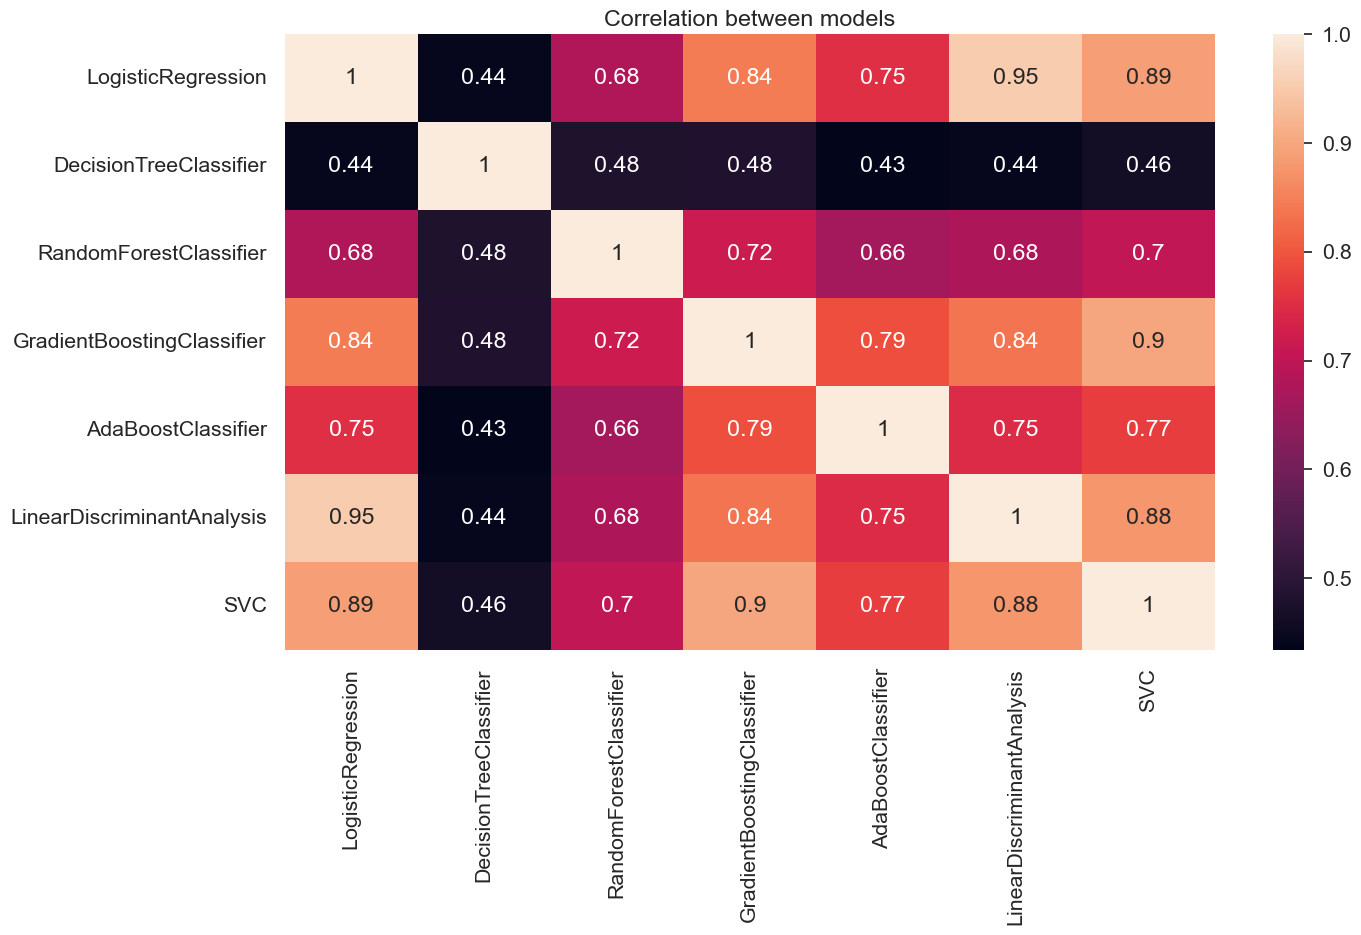

In [71]:
# Calcola la correlazione tra le predizioni dei classificatori
# Rimuovi la colonna 'y' prima di calcolare la correlazione
model_results_without_y = model_results.drop(columns=['y'])

# Calcola la correlazione e visualizzala
plt.figure(figsize=(15,8))
sns.heatmap(model_results_without_y.corr(), annot=True)  # Correlazione tra i classificatori
plt.title("Correlation between models")
plt.show()

In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creazione del Voting Classifier con probabilità per tutti i modelli
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', LogisticRegression(random_state=rs, solver='liblinear')),  # Assicurati di usare un solver che supporti probabilità
        ('dt', DecisionTreeClassifier(random_state=rs)),
        ('rf', RandomForestClassifier(n_estimators=10, random_state=rs)),
        ('gb', GradientBoostingClassifier(random_state=rs)),
        ('ab', AdaBoostClassifier(n_estimators=10, random_state=rs)),
        ('lda', LinearDiscriminantAnalysis()),
        ('svc', SVC(probability=True, random_state=rs))  # Impostato probability=True
    ],
    voting='soft'  # Votazione "soft" per usare le probabilità invece della maggioranza
)


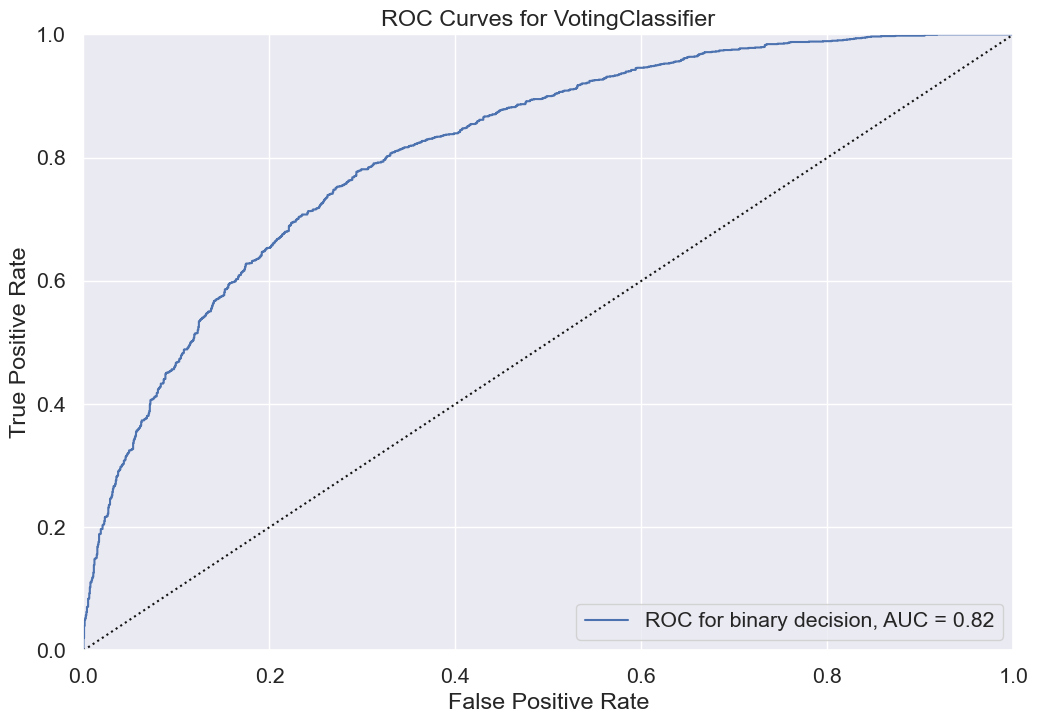

<Axes: title={'center': 'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [73]:
from yellowbrick.classifier import ROCAUC

# Creazione del visualizzatore ROC Curve
plt.figure(figsize=(12,8))
visualizer = ROCAUC(voting_clf, classes=["no_precipitation", "precipitation"], micro=False, macro=False, binary=True)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()


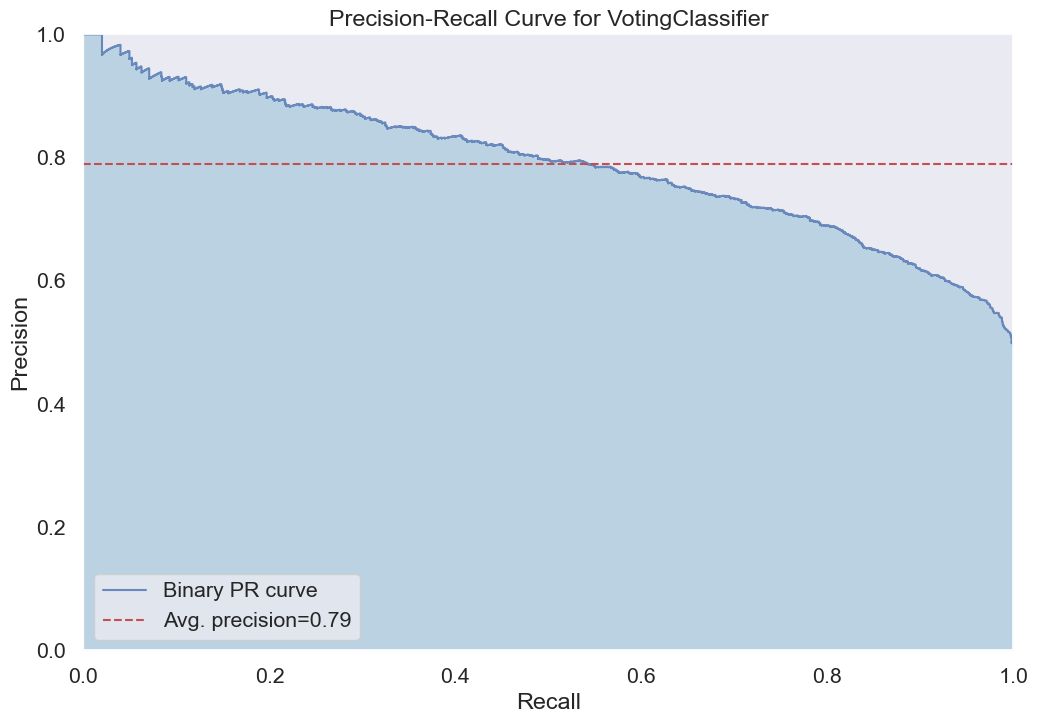

<Axes: title={'center': 'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [74]:
from yellowbrick.classifier import PrecisionRecallCurve

# Creazione del visualizzatore Precision-Recall Curve
plt.figure(figsize=(12,8))
viz = PrecisionRecallCurve(voting_clf)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()


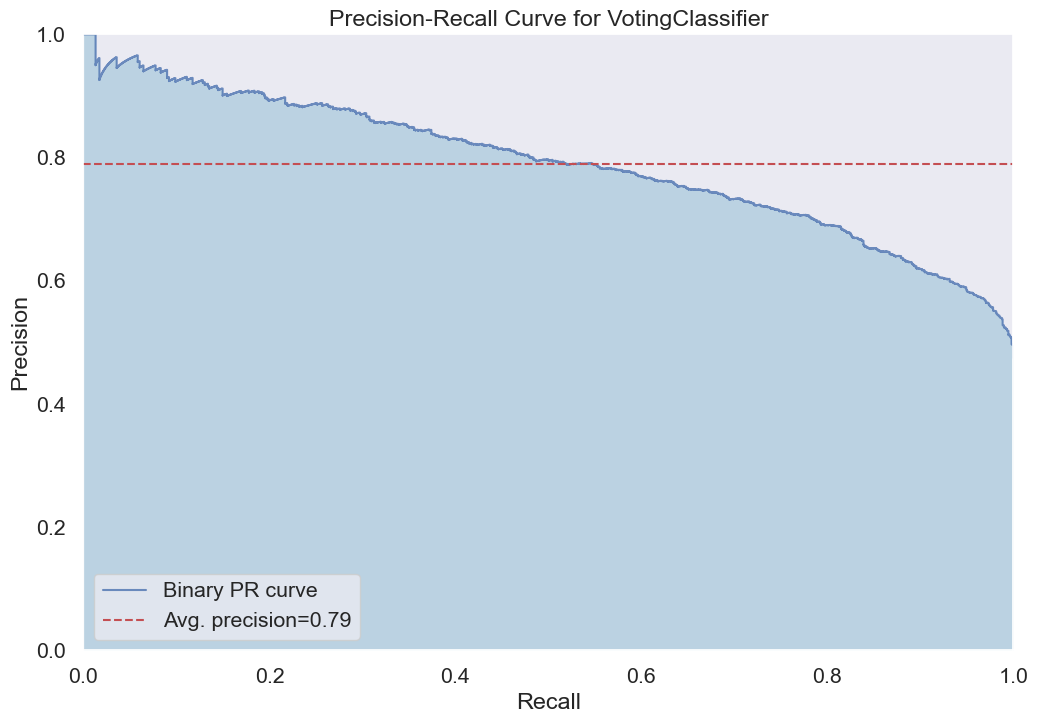

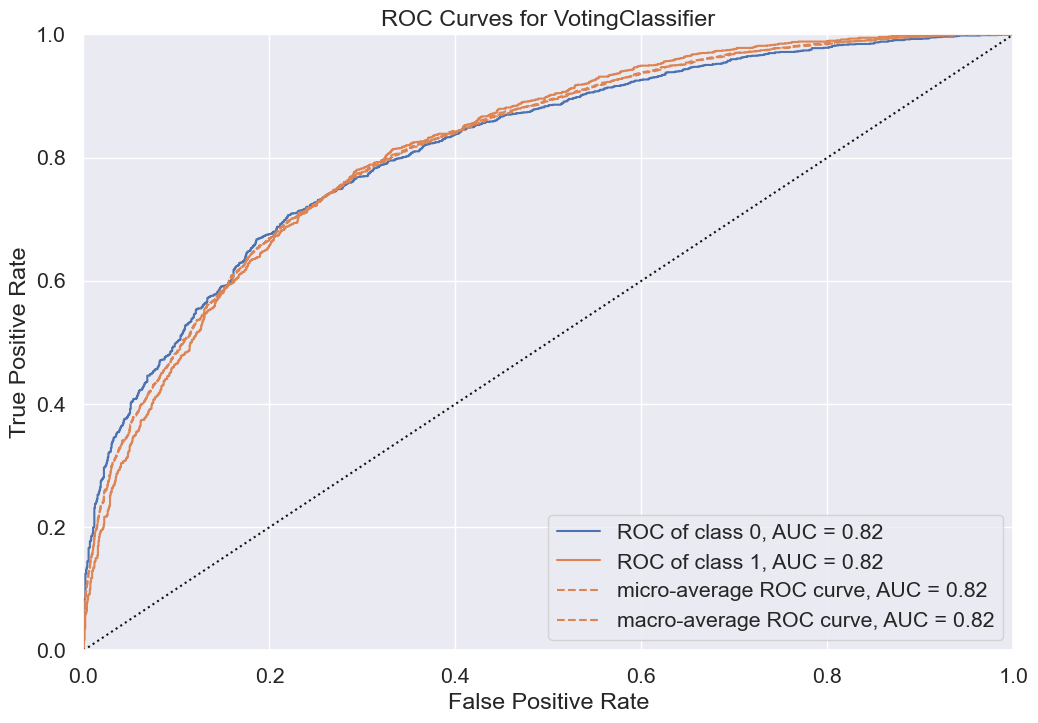

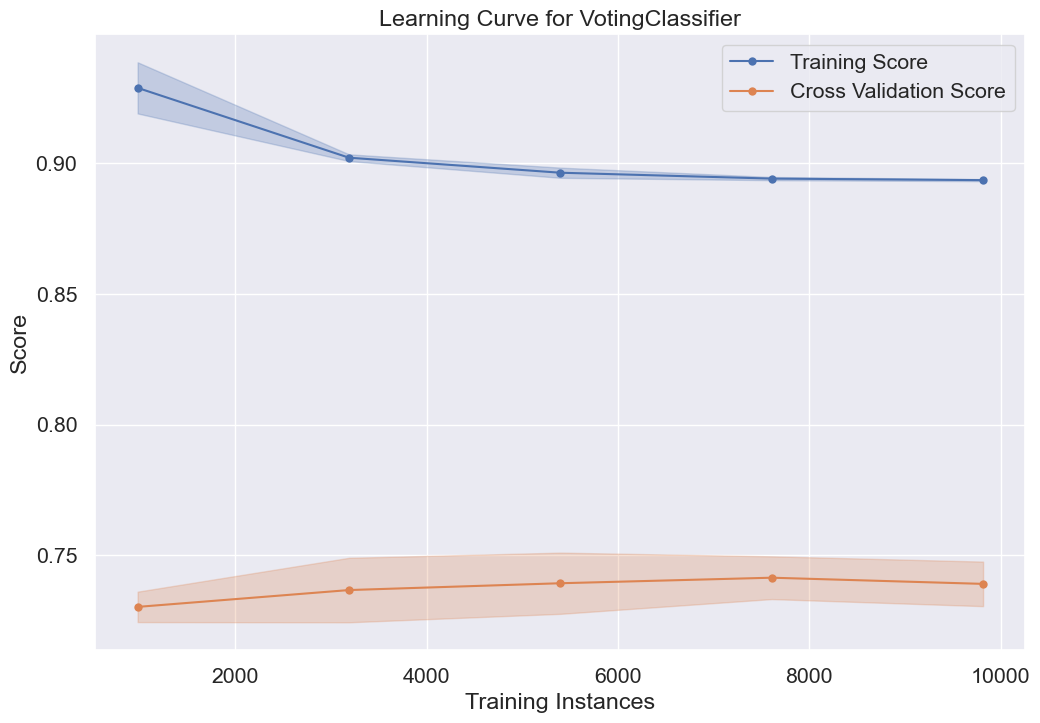

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC
from yellowbrick.model_selection import LearningCurve
import matplotlib.pyplot as plt

# Seleziona le variabili X (features) e y (target)
x = data[numerical_columns]  # Features
y = data['y']  # Target (0: no precipitation, 1: precipitation)

# Random state
rs = 42

# Normalizza i dati
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split dei dati in training e test set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=rs)

# Lista dei classificatori
classifiers = [
    ('log_reg', LogisticRegression(random_state=rs)),
    ('dec_tree', DecisionTreeClassifier(random_state=rs)),
    ('rand_forest', RandomForestClassifier(n_estimators=10, random_state=rs)),
    ('grad_boost', GradientBoostingClassifier(random_state=rs)),
    ('ada_boost', AdaBoostClassifier(n_estimators=10, random_state=rs)),
    ('lda', LinearDiscriminantAnalysis()),
    ('svc', SVC(probability=True, random_state=rs))
]

# Creazione del Voting Classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Precision-Recall Curve
plt.figure(figsize=(12, 8))
viz_pr = PrecisionRecallCurve(voting_clf)
viz_pr.fit(x_train, y_train)  # Fit il training set al visualizer
viz_pr.score(x_test, y_test)  # Valuta il modello sul test set
viz_pr.show()  # Mostra il grafico

# ROC Curve
plt.figure(figsize=(12, 8))
viz_roc = ROCAUC(voting_clf)
viz_roc.fit(x_train, y_train)  # Fit il training set al visualizer
viz_roc.score(x_test, y_test)  # Valuta il modello sul test set
viz_roc.show()  # Mostra il grafico

# Learning Curve
plt.figure(figsize=(12, 8))
viz_lc = LearningCurve(voting_clf, scoring='accuracy')
viz_lc.fit(x_train, y_train)  # Fit il training set al visualizer
viz_lc.show()  # Mostra il grafico


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# Supponiamo che 'data' contenga i dati originali
# Seleziona solo le colonne numeriche per il pre-processing
numerical_columns = ['cloud_cover', 'sunshine', 'global_radiation', 
                     'max_temp', 'mean_temp', 'min_temp',
                      'pressure', 'snow_depth']

# Gestione valori mancanti
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Inizializza il MinMaxScaler
scaler = MinMaxScaler()

# Applica il MinMaxScaler alle colonne numeriche
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Creazione della colonna binaria 'y' per la classificazione
data['y'] = [0 if x == 0 else 1 for x in data['precipitation']]

# Seleziona le variabili X (features) e y (target)
x = data[numerical_columns]  # Features
y = data['y']  # Target (0: no precipitation, 1: precipitation)

# Split dei dati in training e test set
rs = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# Creazione del Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', LogisticRegression(random_state=rs, solver='liblinear')), 
        ('dt', DecisionTreeClassifier(random_state=rs)),
        ('rf', RandomForestClassifier(n_estimators=10, random_state=rs)),
        ('gb', GradientBoostingClassifier(random_state=rs)),
        ('ab', AdaBoostClassifier(n_estimators=10, random_state=rs)),
        ('lda', LinearDiscriminantAnalysis()),
        ('svc', SVC(probability=True, random_state=rs))  # Impostato probability=True
    ],
    voting='soft'  # Votazione "soft" per usare le probabilità invece della maggioranza
)

# Addestra il modello
voting_clf.fit(x_train, y_train)

# Esegui la previsione sui dati di test
predictions = voting_clf.predict(x_test)

# Visualizza i risultati della previsione
print("Predizioni:", predictions)
print("Valori reali:", y_test.values)

# Previsioni sul dataset di test
# Creiamo un dataset simile a quello che hai nel secondo codice
test_data = data.copy()  # Supponiamo che tu abbia il dataset di test già disponibile

# Riapplichiamo la stessa trasformazione (scaling e creazione della colonna target)
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])
test_data['y'] = [0 if x == 0 else 1 for x in test_data['precipitation']]

# Separiamo le variabili di test (features e target)
x_test_final = test_data[numerical_columns]  # Features
y_test_final = test_data['y']  # Target

# Previsione finale sul test set
livello_pred = pd.Series(voting_clf.predict(x_test_final), name='Livello_test')

# Conta le predizioni (classe 0 e 1)
print(livello_pred.value_counts())


Predizioni: [1 1 1 ... 1 0 0]
Valori reali: [0 1 0 ... 0 1 0]
Livello_test
0    7971
1    7370
Name: count, dtype: int64


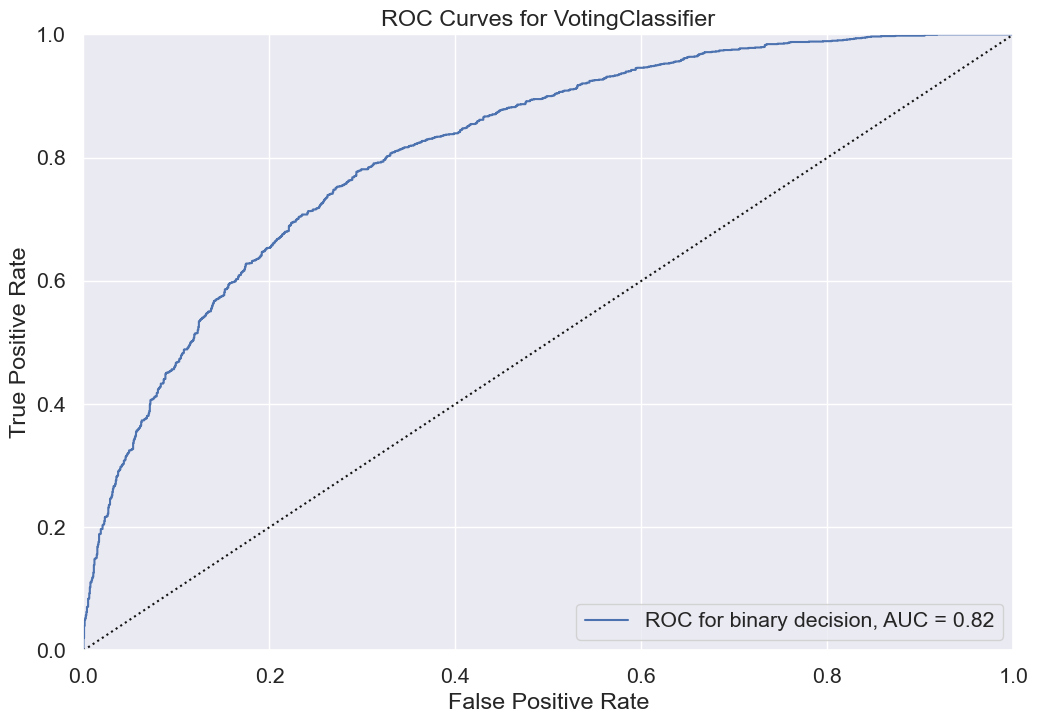

<Axes: title={'center': 'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
from yellowbrick.classifier import ROCAUC
import matplotlib.pyplot as plt

# Crea il visualizzatore della curva ROC
plt.figure(figsize=(12, 8))
visualizer = ROCAUC(voting_clf, classes=[0, 1], micro=False, macro=False, binary=True)

# Adatta il modello e calcola la curva ROC
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

# Mostra la curva ROC
visualizer.show()


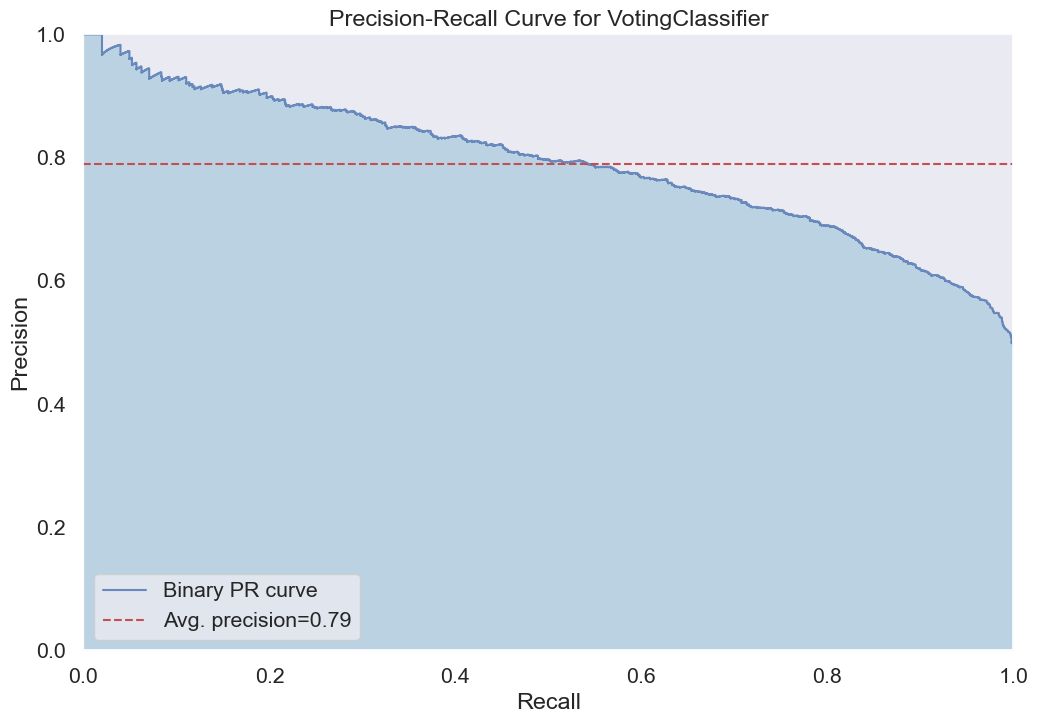

<Axes: title={'center': 'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [78]:
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

# Crea il visualizzatore della curva Precision-Recall
plt.figure(figsize=(12, 8))
viz = PrecisionRecallCurve(voting_clf)

# Adatta il modello e calcola la curva Precision-Recall
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

# Mostra la curva Precision-Recall
viz.show()


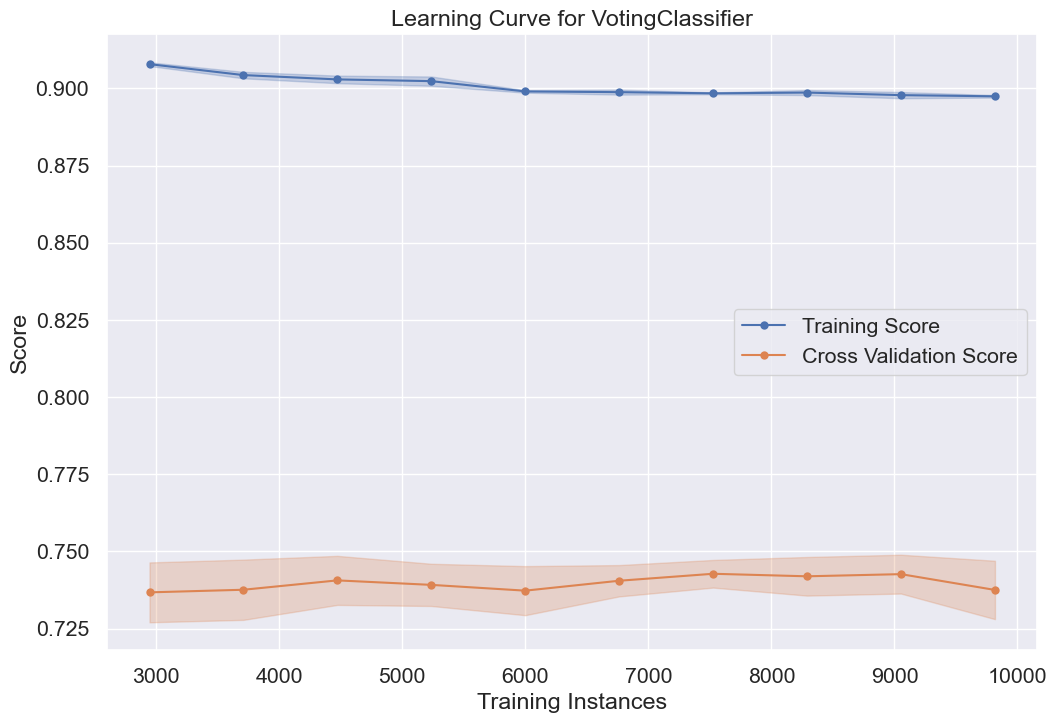

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [79]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Crea la curva di apprendimento
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12, 8))
visualizer = LearningCurve(
    voting_clf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

# Adatta il modello e calcola la curva di apprendimento
visualizer.fit(x_train, y_train)

# Mostra la curva di apprendimento
visualizer.show()


In [83]:
from sklearn.ensemble import VotingClassifier

# Creazione e addestramento del modello
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=rs)),
    ('dt', DecisionTreeClassifier(random_state=rs)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=rs)),
    ('gb', GradientBoostingClassifier(random_state=rs)),
    ('ada', AdaBoostClassifier(n_estimators=10, random_state=rs)),
    ('lda', LinearDiscriminantAnalysis()),
    ('svc', SVC(probability=True, random_state=rs))
], voting='soft')

# Addestramento del Voting Classifier
voting_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=10,
                                                 random_state=42)),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [84]:
# Predizione sui dati di test
y_pred = voting_clf.predict(x_test)


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Calcolo dell'accuratezza (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Altre metriche come F1, precision e recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.7370478983382209
Confusion Matrix:
[[1193  419]
 [ 388 1069]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1612
           1       0.72      0.73      0.73      1457

    accuracy                           0.74      3069
   macro avg       0.74      0.74      0.74      3069
weighted avg       0.74      0.74      0.74      3069

F1 Score: 0.7259762308998302
Precision: 0.7184139784946236
Recall: 0.7336993822923816


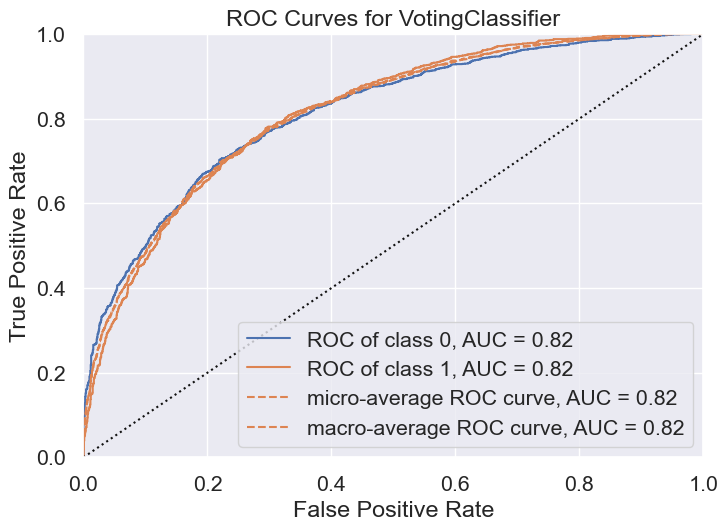

<Axes: title={'center': 'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [86]:
from yellowbrick.classifier import ROCAUC

# Visualizza la ROC Curve
visualizer = ROCAUC(voting_clf)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()


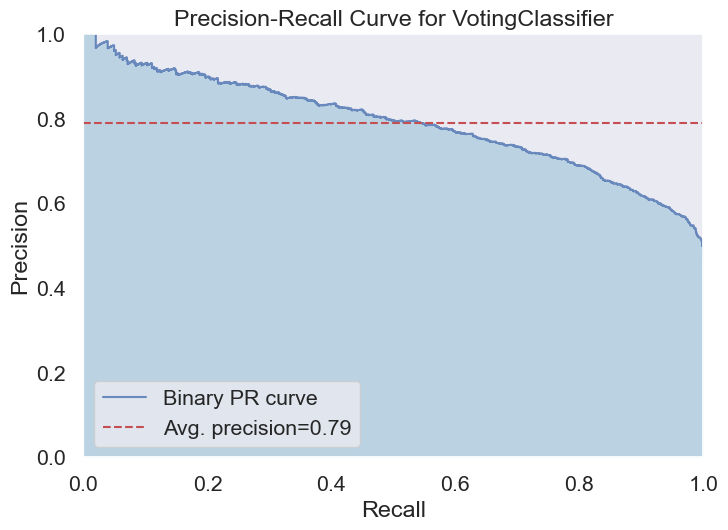

<Axes: title={'center': 'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [87]:
from yellowbrick.classifier import PrecisionRecallCurve

# Visualizza la Precision-Recall Curve
visualizer = PrecisionRecallCurve(voting_clf)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()


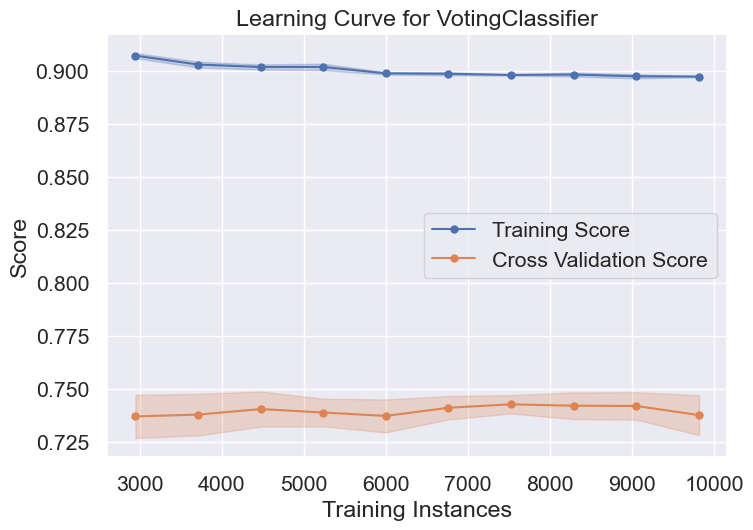

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [91]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Definisci il cross-validation (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5)

# Definisci i vari "train sizes" per la learning curve
sizes = np.linspace(0.3, 1.0, 10)

# Crea la visualizzazione della Learning Curve
visualizer = LearningCurve(
    voting_clf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

# Allena il modello e visualizza la learning curve
visualizer.fit(x_train, y_train)
visualizer.show()

